In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ugradio

## The Double-sideband Mixer (DSB Mixer)

0 dBm = 0.2236V

In [5]:
vsamp = 62.5e6

### Determining signal frequencies

In [6]:
vlo = 0.25*62.5e6
dv = 0.05*vlo
vsig1 = vlo + dv
vsig2 = vlo -dv

In [7]:
vlo #in Hz

15625000.0

In [8]:
dv #Hz

781250.0

In [9]:
vsig1 #Hz

16406250.0

In [10]:
vsig2 #Hz

14843750.0

In [11]:
plus = np.loadtxt('sigplus')
plus

array([ 12032.,   4864.,  11520., ...,   -768.,  11776.,    512.])

In [12]:
minus = np.loadtxt('sigminus')
minus

array([ 11520.,  -3328.,  11776., ...,  -4096.,   4608.,  -4608.])

## Power/Voltage Spectra Functions

In [13]:
def voltage_spectrum(data):
    """
    Input:  data: array of signals
    Output: freqs: x-axis of frequencies
            real: real portion of voltage
            imaginary: imaginary portion of voltage
    """
    ft = np.fft.fft(data)
    real = ft.real
    imaginary = ft.imag
    freqs = np.fft.fftfreq(len(data))*62.5
    return freqs, real, imaginary

In [14]:
def plot_voltage(freqs, real, imag, name):
    """
    Input: freqs: x-axis of frequencies
           real: real portion of voltage
           imag: imaginary portion of voltage
           name: title of the plot
    Output: voltage spectrum
    """
    shifted_real = np.fft.fftshift(real)
    shifted_imag = np.fft.fftshift(imag)
    shifted_freq = np.fft.fftshift(freqs)
    plt.plot(shifted_freq, shifted_real, 'b-.', label='real')
    plt.plot(shifted_freq, shifted_imag, 'g-', label='imaginary')
    plt.title('Voltage Spectrum: '+name)
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Voltage (mV)')
    plt.legend()
    plt.show()

In [15]:
def power_spectrum(data):
    """
    Input: data: array of signals
    Output: freqs: x-axis of frequencies
            power: squared abs(voltage)
    """
    ft = np.fft.fft(data)
    power = abs(ft/(vsamp))**2
    freqs = np.fft.fftfreq(len(data))*62.5
    return freqs, power

In [16]:
def plot_power(freqs, power, name):
    """
    Input: freqs: x-axis of frequencies
           power: array of powers
           name: title of the plot
    Output: power spectrum
    """
    plt.plot(freqs, power)
    plt.rc('font', size=18)
    plt.rc('axes', titlesize=18)
    plt.rc('font',**{'family':'serif','serif':['Times']})
    plt.rc('text', usetex=True)
    plt.title('Power Spectrum: '+name)
    plt.ylabel('Power (mV \r$ \cdot \mu s)^2$')
    plt.xlabel('Frequency (MHz)')
    plt.ylim(0, 1.2)
    plt.savefig(name + '.pdf', bbox_inches = "tight")
    plt.show()

## Power Spectra

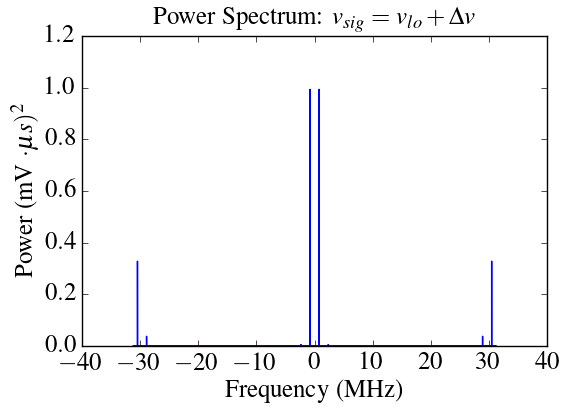

In [18]:
#power spectrum of vsig = vlo + dv
x = power_spectrum(plus)
plot_power(x[0], x[1], "\r$v_{sig} = v_{lo} + \Delta v$")

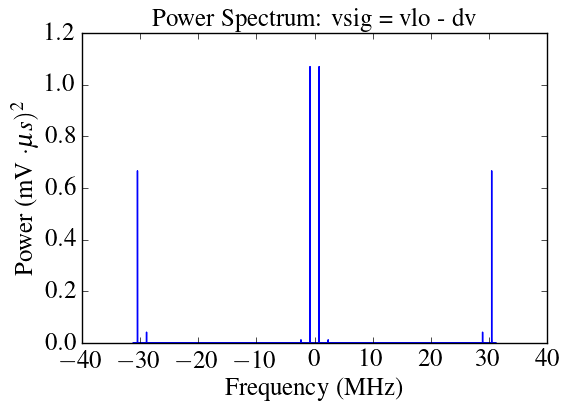

In [15]:
#power spectrum of vsig = vlo - dv
y = power_spectrum(minus)
plot_power(y[0], y[1], "vsig = vlo - dv")

## Plot waveform

In [22]:
# Total time for collection 
timetot = len(plus)/62.5
time = np.linspace(0, timetot, len(plus))
time

array([  0.00000000e+00,   1.60010001e-02,   3.20020001e-02, ...,
         2.55967998e+02,   2.55983999e+02,   2.56000000e+02])

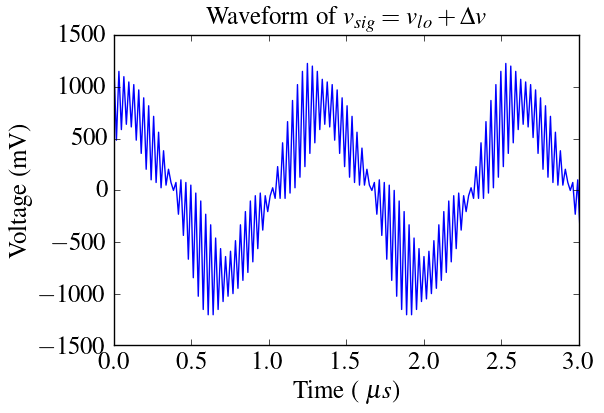

In [31]:
plt.plot(time[0:200], plus[:200]/10)
plt.title('Waveform of \r$v_{sig} = v_{lo} + \Delta v$')
plt.xlabel('Time (\r$\mu s$)')
plt.ylabel('Voltage (mV)')
plt.xlim(0, 3)
plt.savefig('pluswaveform.pdf', bbox_inches = "tight")
plt.show()

## Voltage spectrum

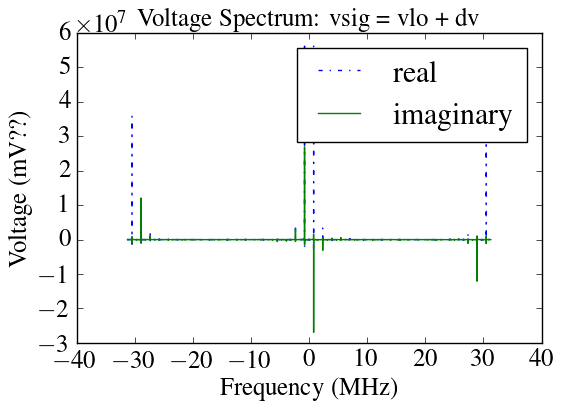

In [18]:
plus_voltage = voltage_spectrum(plus)
plot_voltage(plus_voltage[0], plus_voltage[1], plus_voltage[2], "vsig = vlo + dv")

In [19]:
plus_voltage

(array([ 0.        ,  0.00390625,  0.0078125 , ..., -0.01171875,
        -0.0078125 , -0.00390625]),
 array([ 1076736.       ,    20323.5342138,   -19804.3130704, ...,
          -54180.5049588,   -19804.3130704,    20323.5342138]),
 array([     0.        , -37881.43221463,  -2727.72554046, ...,
          -103.12555005,   2727.72554046,  37881.43221463]))

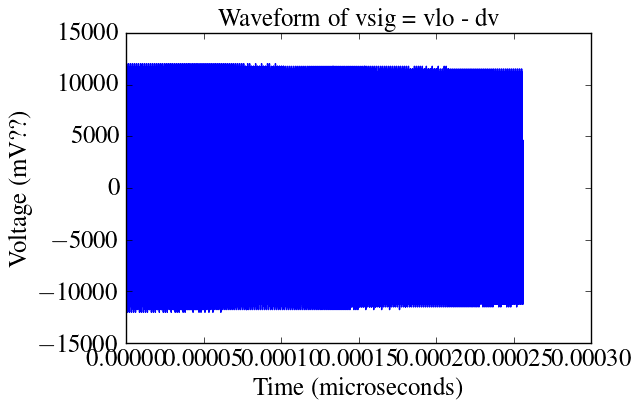

In [20]:
plt.plot(time[0:len(minus)], minus)
plt.title("Waveform of vsig = vlo - dv")
plt.xlabel("Time (microseconds)")
plt.ylabel("Voltage (mV??)")
plt.show()

## Filtering Voltage Spectrum: Sum Frequency

In [21]:
filt_voltage = voltage_spectrum(plus)
max(filt_voltage[0])
def filter_1():
    indices = np.array([])
    for i in np.arange(len(filt_voltage[0])):
        if filt_voltage[0][i] > 5 or filt_voltage[0][i] < -5:
            indices = np.append(indices, i)
    for i in indices:
        filt_voltage[1][int(i)] = 0
        filt_voltage[2][int(i)] = 0
    return filt_voltage[0], filt_voltage[1], filt_voltage[2]
filtered = filter_1()

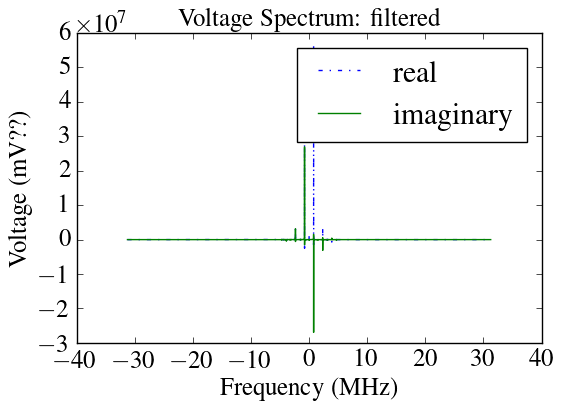

In [22]:
plot_voltage(filtered[0], filtered[1], filtered[2], 'filtered')

### recreating the signal from filtered transform

In [23]:
real_filt = filtered[1]
imag_filt = filtered[2]
complex_filt = real_filt + imag_filt*1j

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


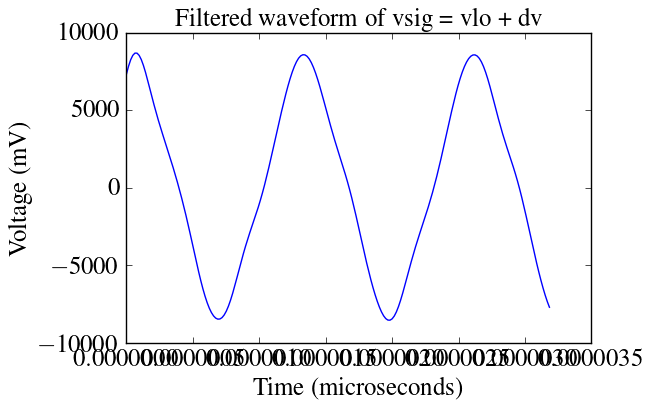

In [24]:
filt_signal = np.fft.ifft(complex_filt)
plt.plot(time[0:200], filt_signal[0:200])
plt.title('Filtered waveform of vsig = vlo + dv')
plt.xlabel('Time (microseconds)')
plt.ylabel('Voltage (mV)')
plt.show()

## As a DSB Mixer

### Retook data as nolambdaplus nolambdaminus, lambdaplus and lambdaminus

In [25]:
vlo2 = 21e6
dv2 = 0.05*vlo2
v2sig1 = vlo2 + dv2
v2sig2 = vlo2 -dv2

In [26]:
dv2

1050000.0

In [27]:
v2sig1

22050000.0

In [28]:
v2sig2

19950000.0

In [29]:
#no_delay_minus = np.loadtxt('ssb_no_delay_minus')
#no_delay_plus = np.loadtxt('ssb_no_delay_plus')
#delay_plus = np.loadtxt('ssb_delay_plus')
#delay_minus = np.loadtxt('ssb_delay_minus')

In [30]:
no_delay_minus = np.loadtxt('nolambdaminus')
no_delay_plus = np.loadtxt('nolambdaplus')
delay_plus = np.loadtxt('lambdaplus')
delay_minus = np.loadtxt('lambdaminus')

In [31]:
no_delay_minus_real = no_delay_minus[:len(no_delay_minus)/2]
no_delay_minus_imag = no_delay_minus[len(no_delay_minus)/2:]

no_delay_plus_real = no_delay_plus[:len(no_delay_plus)/2]
no_delay_plus_imag = no_delay_plus[len(no_delay_plus)/2:]

delay_plus_real = delay_plus[:len(delay_plus)/2]
delay_plus_imag = delay_plus[len(delay_plus)/2:]

delay_minus_real = delay_minus[:len(delay_plus)/2]
delay_minus_imag = delay_minus[len(delay_minus)/2:]

In [32]:
len(no_delay_minus_imag)

16000

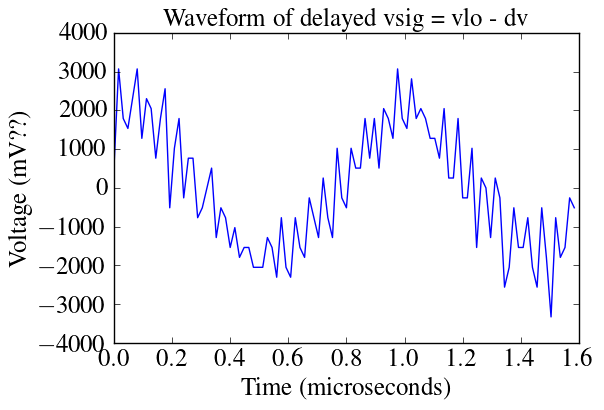

In [33]:
time = np.arange(0, len(delay_minus))/(62.5)
plt.plot(time[0:100],delay_minus[0:100])
plt.xlabel('Time (microseconds)')
plt.title("Waveform of delayed vsig = vlo - dv")
plt.ylabel("Voltage (mV??)")
plt.show()

In [34]:
no_delay_minus_real.shape

(16000,)

In [35]:
no_delay_minus_real

array([ 1536.,  1792.,  1024., ...,   768.,  3584.,     0.])

In [36]:
x

(array([ 0.        ,  0.00390625,  0.0078125 , ..., -0.01171875,
        -0.0078125 , -0.00390625]),
 array([  2.96796266e-04,   4.73100531e-07,   1.02310734e-07, ...,
          7.51497665e-07,   1.02310734e-07,   4.73100531e-07]))

In [37]:
nd_minus = []
a = no_delay_minus_real
b = no_delay_minus_imag
for i in range (0,len(a)):
    nd_minus.append(complex(a[i],b[i]))
    
nd_plus = []
a = no_delay_plus_real
b = no_delay_plus_imag
for i in range (0,len(a)):
    nd_plus.append(complex(a[i],b[i]))

d_plus = []
a = delay_plus_real
b = delay_plus_imag
for i in range(0,len(a)):
    d_plus.append(complex(a[i],b[i]))
    
d_minus = []
a = delay_minus_real
b = delay_minus_imag
for i in range (0,len(a)):
    d_minus.append(complex(a[i],b[i]))

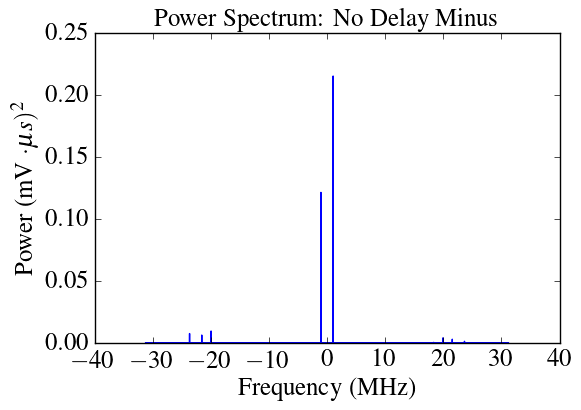

In [38]:
t = power_spectrum(nd_minus)
t[1][np.where(max(t[1]))] = 0
plot_power(t[0],t[1],"No Delay Minus")

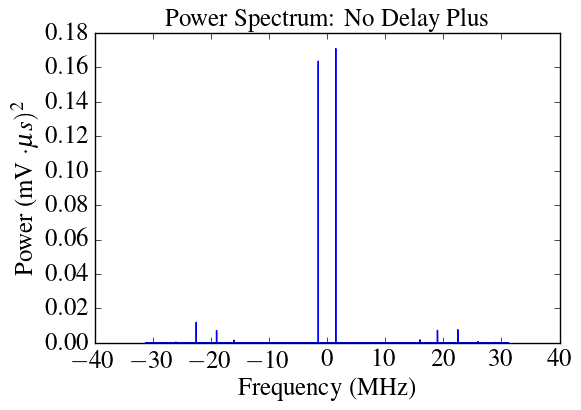

In [39]:
s = power_spectrum(nd_plus)
s[1][np.where(max(s[1]))] = 0
plot_power(s[0],s[1],"No Delay Plus")

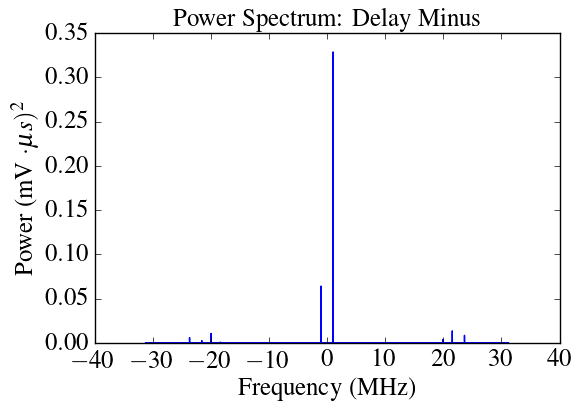

In [40]:
u = power_spectrum(d_minus)
u[1][np.where(max(u[1]))] = 0
plot_power(u[0],u[1],"Delay Minus")

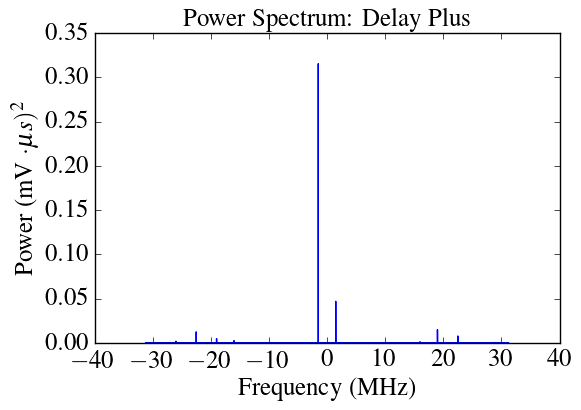

In [41]:
v = power_spectrum(d_plus)
v[1][np.where(max(v[1]))] = 0
plot_power(v[0],v[1],"Delay Plus")